In [1]:
pip install numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\CJ\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


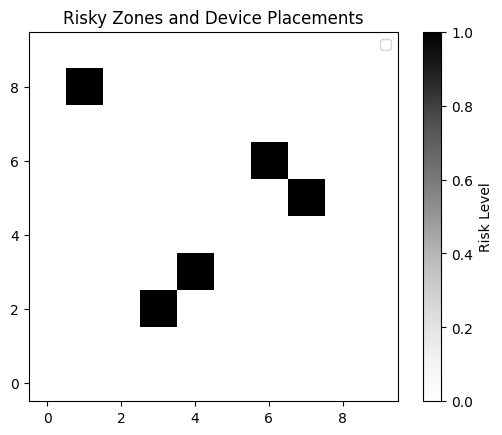

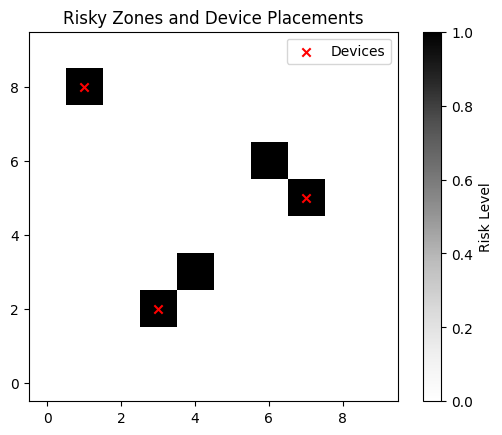

Device Locations: [array([2, 3], dtype=int64), array([5, 7], dtype=int64), array([8, 1], dtype=int64)]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

# Define the grid dimensions (e.g., a 10x10 grid)
grid_size = 10
grid = np.zeros((grid_size, grid_size))

# Define risky areas (wildlife corridors, human activity zones)
# For simplicity, let's manually mark some risky zones
risky_zones = [(2, 3), (5, 7), (8, 1), (6, 6), (3, 4)]
for zone in risky_zones:
    grid[zone] = 1  # Marking risky areas with 1

# Visualize the grid and risky areas
def plot_grid(grid, devices=None):
    plt.imshow(grid, cmap="Greys", origin='lower')
    plt.colorbar(label="Risk Level")
    if devices:
        devices = np.array(devices)
        plt.scatter(devices[:, 1], devices[:, 0], color='red', label='Devices', marker='x')
    plt.title("Risky Zones and Device Placements")
    plt.legend()
    plt.show()

plot_grid(grid)

# Function to calculate coverage based on distance
def is_covered(device, zone, coverage_radius):
    return distance.euclidean(device, zone) <= coverage_radius

# Greedy Algorithm for optimizing device placement
def optimize_device_placement(grid, coverage_radius):
    risky_zones = np.argwhere(grid == 1)
    devices = []
    covered_zones = set()

    while len(covered_zones) < len(risky_zones):
        # Find the most uncovered risky zone
        uncovered_zones = [zone for zone in risky_zones if tuple(zone) not in covered_zones]
        if not uncovered_zones:
            break
        # Place device at an uncovered risky zone
        new_device = uncovered_zones[0]  # Can be improved by more intelligent choice
        devices.append(new_device)
        
        # Mark zones covered by this new device
        for zone in risky_zones:
            if is_covered(new_device, zone, coverage_radius):
                covered_zones.add(tuple(zone))
    
    return devices

# Define the coverage radius (how far each device can "see")
coverage_radius = 2.5

# Optimize device placement
device_locations = optimize_device_placement(grid, coverage_radius)

# Visualize the result
plot_grid(grid, device_locations)

print("Device Locations:", device_locations)


In [3]:
pip install geopandas folium seaborn matplotlib

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for folium from https://files.pythonhosted.org/packages/ae/6d/18a7546e1748ecdd6ed7cd00d3f183faf1df08bd4f5e5e0eb3e72458b862/folium-0.17.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/94/8d/24f21e6a93ca418231aee3bddade7a0766c89c523832f29e08a8860f83e6/pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/26/0c/b084e8839a117eaad8cb4fbaa81bbb24c6f183de0ee95c6c4e2770ab6f09/pyproj-3.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/b1/5a/6a67d929c467a1973b6bb9f0b00159cc343b02bf9a8d26db1abd2f87aa23/


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: C:\Users\CJ\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [8]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data (assuming you have lat/lon and population density)
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet
# Example DataFrame structure: ['State', 'Lat', 'Lon', 'TigerCount']
# Ensure you have these columns in your Excel sheet.

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents
# Ensure your CSV file has 'Lat' and 'Lon' columns.

# Proposed device locations (generated through optimization)
device_locations = [(21.5, 79.1), (27.6, 81.6)]  # Example: Add your own device placements (Lat, Lon)

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Plot tiger population as a heatmap
heatmap_data = [[row['Lat'], row['Lon'], row['TigerCount']] for index, row in tiger_population.iterrows()]

# Create the heatmap layer
HeatMap(heatmap_data, radius=15, max_zoom=13).add_to(m)

# Plot poaching data as red circles
for _, row in poaching_data.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Lon']),
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup="Poaching Incident"
    ).add_to(m)

# Plot device locations as blue markers
for device in device_locations:
    folium.Marker(
        location=device,
        popup="Proposed Device",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map and save it as an HTML file
m.save('tiger_poaching_map.html')
m


KeyError: 'Lat'

In [9]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data (assuming you have lat/lon and population density)
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet

# Print column names to debug
print("Tiger Population Columns:", tiger_population.columns)

# Strip any extra spaces from the column names
tiger_population.columns = tiger_population.columns.str.strip()

# Check the updated column names after stripping spaces
print("Updated Tiger Population Columns:", tiger_population.columns)

# Prepare heatmap data
try:
    heatmap_data = [[row['Lat'], row['Lon'], row['TigerCount']] for index, row in tiger_population.iterrows()]
except KeyError as e:
    print(f"KeyError: {e}. Please check your column names in the DataFrame.")

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents

# Proposed device locations (generated through optimization)
device_locations = [(21.5, 79.1), (27.6, 81.6)]  # Example: Add your own device placements (Lat, Lon)

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Create the heatmap layer
if 'Lat' in tiger_population.columns and 'Lon' in tiger_population.columns and 'TigerCount' in tiger_population.columns:
    HeatMap(heatmap_data, radius=15, max_zoom=13).add_to(m)

# Plot poaching data as red circles
for _, row in poaching_data.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Lon']),
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup="Poaching Incident"
    ).add_to(m)

# Plot device locations as blue markers
for device in device_locations:
    folium.Marker(
        location=device,
        popup="Proposed Device",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map and save it as an HTML file
m.save('tiger_poaching_map.html')
m


Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')
Updated Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')
KeyError: 'Lat'. Please check your column names in the DataFrame.


In [10]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet

# Print column names to debug
print("Tiger Population Columns:", tiger_population.columns)

# Strip any extra spaces from the column names
tiger_population.columns = tiger_population.columns.str.strip()

# Prepare heatmap data
heatmap_data = [[row['Lat'], row['Lon'], row['TigerCount']] for index, row in tiger_population.iterrows()]

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents

# Prepare data for clustering
poaching_coords = poaching_data[['Lat', 'Lon']].values

# Apply K-means clustering
num_devices = 5  # You can adjust the number of clusters (devices) here
kmeans = KMeans(n_clusters=num_devices)
kmeans.fit(poaching_coords)

# Get the cluster centers
device_locations = kmeans.cluster_centers_

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Create the heatmap layer for tiger population
HeatMap(heatmap_data, radius=15, max_zoom=13).add_to(m)

# Plot poaching data as red circles
for _, row in poaching_data.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Lon']),
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup="Poaching Incident"
    ).add_to(m)

# Plot device locations as blue markers
for device in device_locations:
    folium.Marker(
        location=(device[0], device[1]),
        popup="Proposed Device",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map and save it as an HTML file
m.save('tiger_poaching_map_with_devices.html')
m


Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')


KeyError: 'Lat'

In [11]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet

# Print column names to debug
print("Tiger Population Columns:", tiger_population.columns)

# Strip any extra spaces from the column names
tiger_population.columns = tiger_population.columns.str.strip()

# Prepare heatmap data using the correct column names
heatmap_data = [[row['Latitude'], row['Longitude'], row['Tiger Population']] for index, row in tiger_population.iterrows()]

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents

# Prepare data for clustering
poaching_coords = poaching_data[['Latitude', 'Longitude']].values  # Use correct column names

# Apply K-means clustering
num_devices = 5  # You can adjust the number of clusters (devices) here
kmeans = KMeans(n_clusters=num_devices)
kmeans.fit(poaching_coords)

# Get the cluster centers
device_locations = kmeans.cluster_centers_

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Create the heatmap layer for tiger population
HeatMap(heatmap_data, radius=15, max_zoom=13).add_to(m)

# Plot poaching data as red circles
for _, row in poaching_data.iterrows():
    folium.CircleMarker(
        location=(row['Latitude'], row['Longitude']),
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup="Poaching Incident"
    ).add_to(m)

# Plot device locations as blue markers
for device in device_locations:
    folium.Marker(
        location=(device[0], device[1]),
        popup="Proposed Device",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map and save it as an HTML file
m.save('tiger_poaching_map_with_devices.html')
m


Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')


KeyError: "None of [Index(['Latitude', 'Longitude'], dtype='object')] are in the [columns]"

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load tiger population data
tiger_population = pd.read_csv("TigerDataIBM.xlsx")  # Replace with your actual file name
tiger_population.columns = tiger_population.columns.str.strip()  # Strip any whitespace from column names

# Print tiger population data columns to verify names
print("Tiger Population Columns:", tiger_population.columns)

# Prepare heatmap data (adjust column names if necessary)
heatmap_data = [
    [row['Latitude'], row['Longitude'], row['Tiger Population']]
    for index, row in tiger_population.iterrows()
]

# Load poaching data
poaching_data = pd.read_csv("poaching_data.csv")  # Replace with your actual file name

# Print poaching data columns to verify names
print("Poaching Data Columns:", poaching_data.columns)

# Prepare data for clustering (adjust based on actual column names)
# Change 'Latitude' and 'Longitude' if they have different names in the CSV
poaching_coords = poaching_data[['Lat', 'Lon']].values

# Apply K-means clustering
num_devices = 5  # You can adjust the number of clusters (devices) here
kmeans = KMeans(n_clusters=num_devices)
kmeans.fit(poaching_coords)

# Get the cluster centers (device locations)
device_locations = kmeans.cluster_centers_

# Print device locations
print("Device Locations (Cluster Centers):")
for i, loc in enumerate(device_locations):
    print(f"Device {i + 1}: Latitude = {loc[0]}, Longitude = {loc[1]}")

# Optional: Plotting the results
plt.figure(figsize=(10, 6))

# Plot poaching incidents
plt.scatter(poaching_coords[:, 0], poaching_coords[:, 1], c='red', label='Poaching Incidents', alpha=0.5)

# Plot device locations
plt.scatter(device_locations[:, 0], device_locations[:, 1], c='blue', label='Device Locations', marker='X', s=200)

plt.title('Poaching Incidents and Device Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid()
plt.show()


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 15-16: invalid continuation byte

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load tiger population data from an Excel file
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Replace with your actual file name
tiger_population.columns = tiger_population.columns.str.strip()  # Strip any whitespace from column names

# Print tiger population data columns to verify names
print("Tiger Population Columns:", tiger_population.columns)

# Prepare heatmap data (adjust column names if necessary)
heatmap_data = [
    [row['Latitude'], row['Longitude'], row['Tiger Population']]
    for index, row in tiger_population.iterrows()
]

# Load poaching data
poaching_data = pd.read_excel("poaching_data.csv")  # Replace with your actual file name

# Print poaching data columns to verify names
print("Poaching Data Columns:", poaching_data.columns)

# Prepare data for clustering (adjust based on actual column names)
# Change 'Latitude' and 'Longitude' if they have different names in the Excel file
poaching_coords = poaching_data[['Lat', 'Lon']].values

# Apply K-means clustering
num_devices = 5  # You can adjust the number of clusters (devices) here
kmeans = KMeans(n_clusters=num_devices)
kmeans.fit(poaching_coords)

# Get the cluster centers (device locations)
device_locations = kmeans.cluster_centers_

# Print device locations
print("Device Locations (Cluster Centers):")
for i, loc in enumerate(device_locations):
    print(f"Device {i + 1}: Latitude = {loc[0]}, Longitude = {loc[1]}")

# Optional: Plotting the results
plt.figure(figsize=(10, 6))

# Plot poaching incidents
plt.scatter(poaching_coords[:, 0], poaching_coords[:, 1], c='red', label='Poaching Incidents', alpha=0.5)

# Plot device locations
plt.scatter(device_locations[:, 0], device_locations[:, 1], c='blue', label='Device Locations', marker='X', s=200)

plt.title('Poaching Incidents and Device Locations')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.legend()
plt.grid()
plt.show()


Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')


ValueError: Excel file format cannot be determined, you must specify an engine manually.

In [17]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data (assuming you have lat/lon and population density)
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet

# Print column names to debug
print("Tiger Population Columns:", tiger_population.columns)

# Strip any extra spaces from the column names
tiger_population.columns = tiger_population.columns.str.strip()

# Check the updated column names after stripping spaces
print("Updated Tiger Population Columns:", tiger_population.columns)

# Prepare heatmap data
try:
    heatmap_data = [[row['Lat'], row['Lon'], row['TigerCount']] for index, row in tiger_population.iterrows()]
except KeyError as e:
    print(f"KeyError: {e}. Please check your column names in the DataFrame.")

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents

# Prepare poaching coordinates for clustering
poaching_coords = poaching_data[['Lat', 'Lon']].values

# Determine the number of clusters based on the number of poaching incidents (or adjust this number)
num_clusters = min(len(poaching_coords), 10)  # Max 10 devices or the number of incidents, whichever is smaller

# Apply K-means clustering to find device locations
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(poaching_coords)

# Get the cluster centers (device locations)
device_locations = kmeans.cluster_centers_

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Create the heatmap layer
if 'Lat' in tiger_population.columns and 'Lon' in tiger_population.columns and 'TigerCount' in tiger_population.columns:
    HeatMap(heatmap_data, radius=15, max_zoom=13).add_to(m)

# Plot poaching data as red circles
for _, row in poaching_data.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Lon']),
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup="Poaching Incident"
    ).add_to(m)

# Plot device locations as blue markers
for device in device_locations:
    folium.Marker(
        location=(device[0], device[1]),
        popup="Proposed Device",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map and save it as an HTML file
m.save('tiger_poaching_map.html')
m


Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')
Updated Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')
KeyError: 'Lat'. Please check your column names in the DataFrame.


C:\Users\CJ\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data (assuming you have lat/lon and population density)
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet

# Print column names to debug
print("Tiger Population Columns:", tiger_population.columns)

# Strip any extra spaces from the column names
tiger_population.columns = tiger_population.columns.str.strip()

# Check the updated column names after stripping spaces
print("Updated Tiger Population Columns:", tiger_population.columns)

# Prepare heatmap data using the correct column names
try:
    heatmap_data = [[row['Latitude'], row['Longitude'], row['Tiger Population']] for index, row in tiger_population.iterrows()]
except KeyError as e:
    print(f"KeyError: {e}. Please check your column names in the DataFrame.")

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents

# Prepare poaching coordinates for clustering using the correct column names
poaching_coords = poaching_data[['Lat', 'Lon']].values

# Determine the number of clusters based on the number of poaching incidents (or adjust this number)
num_clusters = min(len(poaching_coords), 10)  # Max 10 devices or the number of incidents, whichever is smaller

# Apply K-means clustering to find device locations
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # Set n_init explicitly
kmeans.fit(poaching_coords)

# Get the cluster centers (device locations)
device_locations = kmeans.cluster_centers_

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Create the heatmap layer
if 'Latitude' in tiger_population.columns and 'Longitude' in tiger_population.columns and 'Tiger Population' in tiger_population.columns:
    HeatMap(heatmap_data, radius=15, max_zoom=13).add_to(m)

# Plot poaching data as red circles
for _, row in poaching_data.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Lon']),
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup="Poaching Incident"
    ).add_to(m)

# Plot device locations as blue markers
for device in device_locations:
    folium.Marker(
        location=(device[0], device[1]),
        popup="Proposed Device",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map and save it as an HTML file
m.save('tiger_poaching_map.html')
m


Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')
Updated Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')


In [19]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data (assuming you have lat/lon and population density)
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet

# Print column names to debug
print("Tiger Population Columns:", tiger_population.columns)

# Strip any extra spaces from the column names
tiger_population.columns = tiger_population.columns.str.strip()

# Check the updated column names after stripping spaces
print("Updated Tiger Population Columns:", tiger_population.columns)

# Prepare heatmap data using the correct column names
try:
    heatmap_data = [[row['Latitude'], row['Longitude'], row['Tiger Population']] for index, row in tiger_population.iterrows()]
except KeyError as e:
    print(f"KeyError: {e}. Please check your column names in the DataFrame.")

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents

# Prepare poaching coordinates for clustering using the correct column names
poaching_coords = poaching_data[['Lat', 'Lon']].values

# Determine the number of clusters based on the number of poaching incidents (increase this number for more devices)
num_clusters = min(len(poaching_coords), 20)  # Increase to 20 or another suitable number

# Apply K-means clustering to find device locations
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # Set n_init explicitly
kmeans.fit(poaching_coords)

# Get the cluster centers (device locations)
device_locations = kmeans.cluster_centers_

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Create the heatmap layer
if 'Latitude' in tiger_population.columns and 'Longitude' in tiger_population.columns and 'Tiger Population' in tiger_population.columns:
    HeatMap(heatmap_data, radius=15, max_zoom=13).add_to(m)

# Plot poaching data as red circles
for _, row in poaching_data.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Lon']),
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup="Poaching Incident"
    ).add_to(m)

# Plot device locations as blue markers
for device in device_locations:
    folium.Marker(
        location=(device[0], device[1]),
        popup="Proposed Device",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map and save it as an HTML file
m.save('tiger_poaching_map.html')
m


Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')
Updated Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')


In [20]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data (assuming you have lat/lon and population density)
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet

# Print column names to debug
print("Tiger Population Columns:", tiger_population.columns)

# Strip any extra spaces from the column names
tiger_population.columns = tiger_population.columns.str.strip()

# Check the updated column names after stripping spaces
print("Updated Tiger Population Columns:", tiger_population.columns)

# Prepare heatmap data using the correct column names
try:
    heatmap_data = [[row['Latitude'], row['Longitude'], row['Tiger Population']] for index, row in tiger_population.iterrows()]
except KeyError as e:
    print(f"KeyError: {e}. Please check your column names in the DataFrame.")

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents

# Prepare poaching coordinates for clustering using the correct column names
poaching_coords = poaching_data[['Lat', 'Lon']].values

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Create the heatmap layer
if 'Latitude' in tiger_population.columns and 'Longitude' in tiger_population.columns and 'Tiger Population' in tiger_population.columns:
    HeatMap(heatmap_data, radius=15, max_zoom=13).add_to(m)

# Plot poaching data as red circles (no blue device markers here)
for _, row in poaching_data.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Lon']),
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup="Poaching Incident"
    ).add_to(m)

# Display the map and save it as an HTML file
m.save('tiger_poaching_map_no_devices.html')
m


Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')
Updated Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')


In [21]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data (assuming you have lat/lon and population density)
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet

# Print column names to debug
print("Tiger Population Columns:", tiger_population.columns)

# Strip any extra spaces from the column names
tiger_population.columns = tiger_population.columns.str.strip()

# Check the updated column names after stripping spaces
print("Updated Tiger Population Columns:", tiger_population.columns)

# Prepare heatmap data using the correct column names
try:
    heatmap_data = [[row['Latitude'], row['Longitude'], row['Tiger Population']] for index, row in tiger_population.iterrows()]
except KeyError as e:
    print(f"KeyError: {e}. Please check your column names in the DataFrame.")

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents

# Prepare heatmap data for poaching incidents
poaching_heatmap_data = [[row['Lat'], row['Lon']] for index, row in poaching_data.iterrows()]

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Create a heatmap layer for poaching incidents
HeatMap(poaching_heatmap_data, radius=15, max_zoom=13).add_to(m)

# Display the map and save it as an HTML file
m.save('poaching_heatmap.html')
m


Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')
Updated Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')


In [22]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data (assuming you have lat/lon and population density)
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet

# Print column names to debug
print("Tiger Population Columns:", tiger_population.columns)

# Strip any extra spaces from the column names
tiger_population.columns = tiger_population.columns.str.strip()

# Check the updated column names after stripping spaces
print("Updated Tiger Population Columns:", tiger_population.columns)

# Prepare heatmap data using the correct column names
try:
    heatmap_data = [[row['Latitude'], row['Longitude'], row['Tiger Population']] for index, row in tiger_population.iterrows()]
except KeyError as e:
    print(f"KeyError: {e}. Please check your column names in the DataFrame.")

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents

# Prepare poaching coordinates for clustering using the correct column names
poaching_coords = poaching_data[['Lat', 'Lon']].values

# Determine the number of clusters based on the number of poaching incidents (increase this number for more devices)
num_clusters = min(len(poaching_coords), 20)  # Increase to 20 or another suitable number

# Apply K-means clustering to find device locations
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # Set n_init explicitly
kmeans.fit(poaching_coords)

# Get the cluster centers (device locations)
device_locations = kmeans.cluster_centers_

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Create the heatmap layer with a custom gradient to remove low-density blue spots
if 'Latitude' in tiger_population.columns and 'Longitude' in tiger_population.columns and 'Tiger Population' in tiger_population.columns:
    HeatMap(
        heatmap_data,
        radius=15,
        max_zoom=13,
        gradient={0.2: 'green', 0.4: 'yellow', 0.6: 'orange', 1: 'red'},  # Adjust the gradient to remove blue
    ).add_to(m)

# Plot poaching data as red circles
for _, row in poaching_data.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Lon']),
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup="Poaching Incident"
    ).add_to(m)

# Plot device locations as blue markers
for device in device_locations:
    folium.Marker(
        location=(device[0], device[1]),
        popup="Proposed Device",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map and save it as an HTML file
m.save('tiger_poaching_map_no_random_blue_spots.html')
m


Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')
Updated Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')


In [23]:
import geopandas as gpd
import pandas as pd
import folium
from folium.plugins import HeatMap
from sklearn.cluster import KMeans

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data (assuming you have lat/lon and population density)
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet

# Print column names to debug
print("Tiger Population Columns:", tiger_population.columns)

# Strip any extra spaces from the column names
tiger_population.columns = tiger_population.columns.str.strip()

# Check the updated column names after stripping spaces
print("Updated Tiger Population Columns:", tiger_population.columns)

# Filter out low-density tiger population points to remove unwanted spots
min_population_threshold = 10  # Adjust this threshold as needed to remove low-density points
filtered_tiger_population = tiger_population[tiger_population['Tiger Population'] > min_population_threshold]

# Prepare heatmap data using the correct column names and filtered data
try:
    heatmap_data = [[row['Latitude'], row['Longitude'], row['Tiger Population']] for index, row in filtered_tiger_population.iterrows()]
except KeyError as e:
    print(f"KeyError: {e}. Please check your column names in the DataFrame.")

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents

# Prepare poaching coordinates for clustering using the correct column names
poaching_coords = poaching_data[['Lat', 'Lon']].values

# Determine the number of clusters based on the number of poaching incidents (increase this number for more devices)
num_clusters = min(len(poaching_coords), 20)  # Increase to 20 or another suitable number

# Apply K-means clustering to find device locations
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # Set n_init explicitly
kmeans.fit(poaching_coords)

# Get the cluster centers (device locations)
device_locations = kmeans.cluster_centers_

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Create the heatmap layer without low-density areas
if 'Latitude' in tiger_population.columns and 'Longitude' in tiger_population.columns and 'Tiger Population' in tiger_population.columns:
    HeatMap(
        heatmap_data,
        radius=15,
        max_zoom=13,
        gradient={0.4: 'green', 0.6: 'orange', 1: 'red'},  # Show only mid- to high-density regions
        blur=20,  # Add some blur to make the heatmap smoother
        min_opacity=0.5  # Reduce opacity for low-density points
    ).add_to(m)

# Plot poaching data as red circles
for _, row in poaching_data.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Lon']),
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup="Poaching Incident"
    ).add_to(m)

# Plot device locations as blue markers
for device in device_locations:
    folium.Marker(
        location=(device[0], device[1]),
        popup="Proposed Device",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map and save it as an HTML file
m.save('tiger_poaching_map_filtered.html')
m


Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')
Updated Tiger Population Columns: Index(['ID', 'State/UT', 'Region/National Park', 'Tiger Population',
       'Population Estimate', 'Conservation Status', 'Habitat Type', 'Threats',
       'Conservation Initiatives', 'Tourism Impact', 'Latitude', 'Longitude',
       'Notes'],
      dtype='object')


In [24]:
import geopandas as gpd
import pandas as pd
import folium
from sklearn.cluster import KMeans

# Load India's map shapefile from the specified folder
india_map = gpd.read_file("gadm41_IND_shp/gadm41_IND_3.shp")  # Ensure this path is correct

# Load tiger population data (assuming you have lat/lon and population density)
tiger_population = pd.read_excel("TigerDataIBM.xlsx")  # Modify based on actual sheet

# Load poaching data (Lat/Lon of high-risk poaching areas)
poaching_data = pd.read_csv("poaching_data.csv")  # Example file containing Lat/Lon of poaching incidents

# Prepare poaching coordinates for clustering using the correct column names
poaching_coords = poaching_data[['Lat', 'Lon']].values

# Determine the number of clusters based on the number of poaching incidents (increase this number for more devices)
num_clusters = min(len(poaching_coords), 20)  # Increase to 20 or another suitable number

# Apply K-means clustering to find device locations
kmeans = KMeans(n_clusters=num_clusters, n_init=10, random_state=42)  # Set n_init explicitly
kmeans.fit(poaching_coords)

# Get the cluster centers (device locations)
device_locations = kmeans.cluster_centers_

# Create a base map using Folium
m = folium.Map(location=[23.5937, 80.9629], zoom_start=5, tiles='CartoDB positron')

# Plot poaching data as red circles
for _, row in poaching_data.iterrows():
    folium.CircleMarker(
        location=(row['Lat'], row['Lon']),
        radius=6,
        color='red',
        fill=True,
        fill_opacity=0.6,
        popup="Poaching Incident"
    ).add_to(m)

# Plot device locations as blue markers
for device in device_locations:
    folium.Marker(
        location=(device[0], device[1]),
        popup="Proposed Device",
        icon=folium.Icon(color='blue')
    ).add_to(m)

# Display the map and save it as an HTML file
m.save('tiger_poaching_map_no_heatmap.html')
m
